In [1]:
# Data Fields
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("train_bikes.csv", parse_dates=["datetime"])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [6]:
df.shape

(10886, 12)

In [7]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


<AxesSubplot:xlabel='season', ylabel='count'>

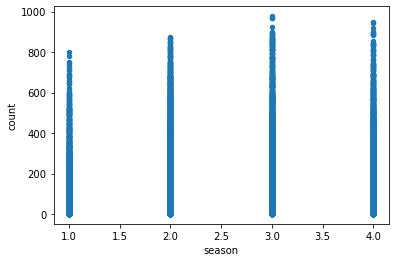

In [10]:
df.plot.scatter(x="season", y="count")

<AxesSubplot:xlabel='holiday', ylabel='count'>

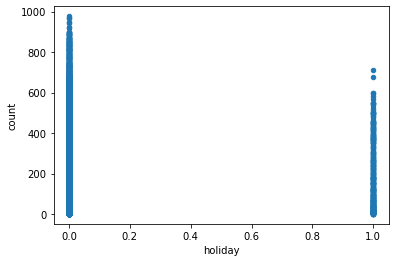

In [11]:
df.plot.scatter(x="holiday", y="count")

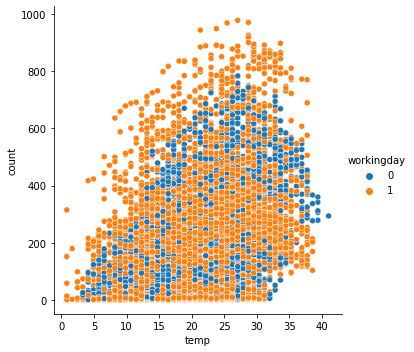

In [12]:
sns.relplot(x="temp", y="count", data=df, hue='workingday')

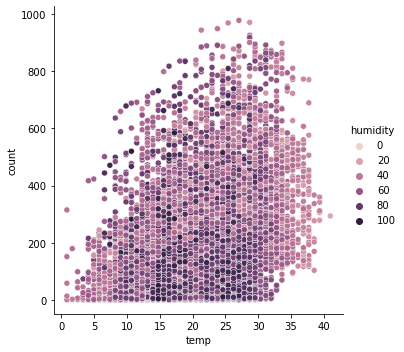

In [13]:
sns.relplot(x="temp", y="count", data=df, hue='humidity')

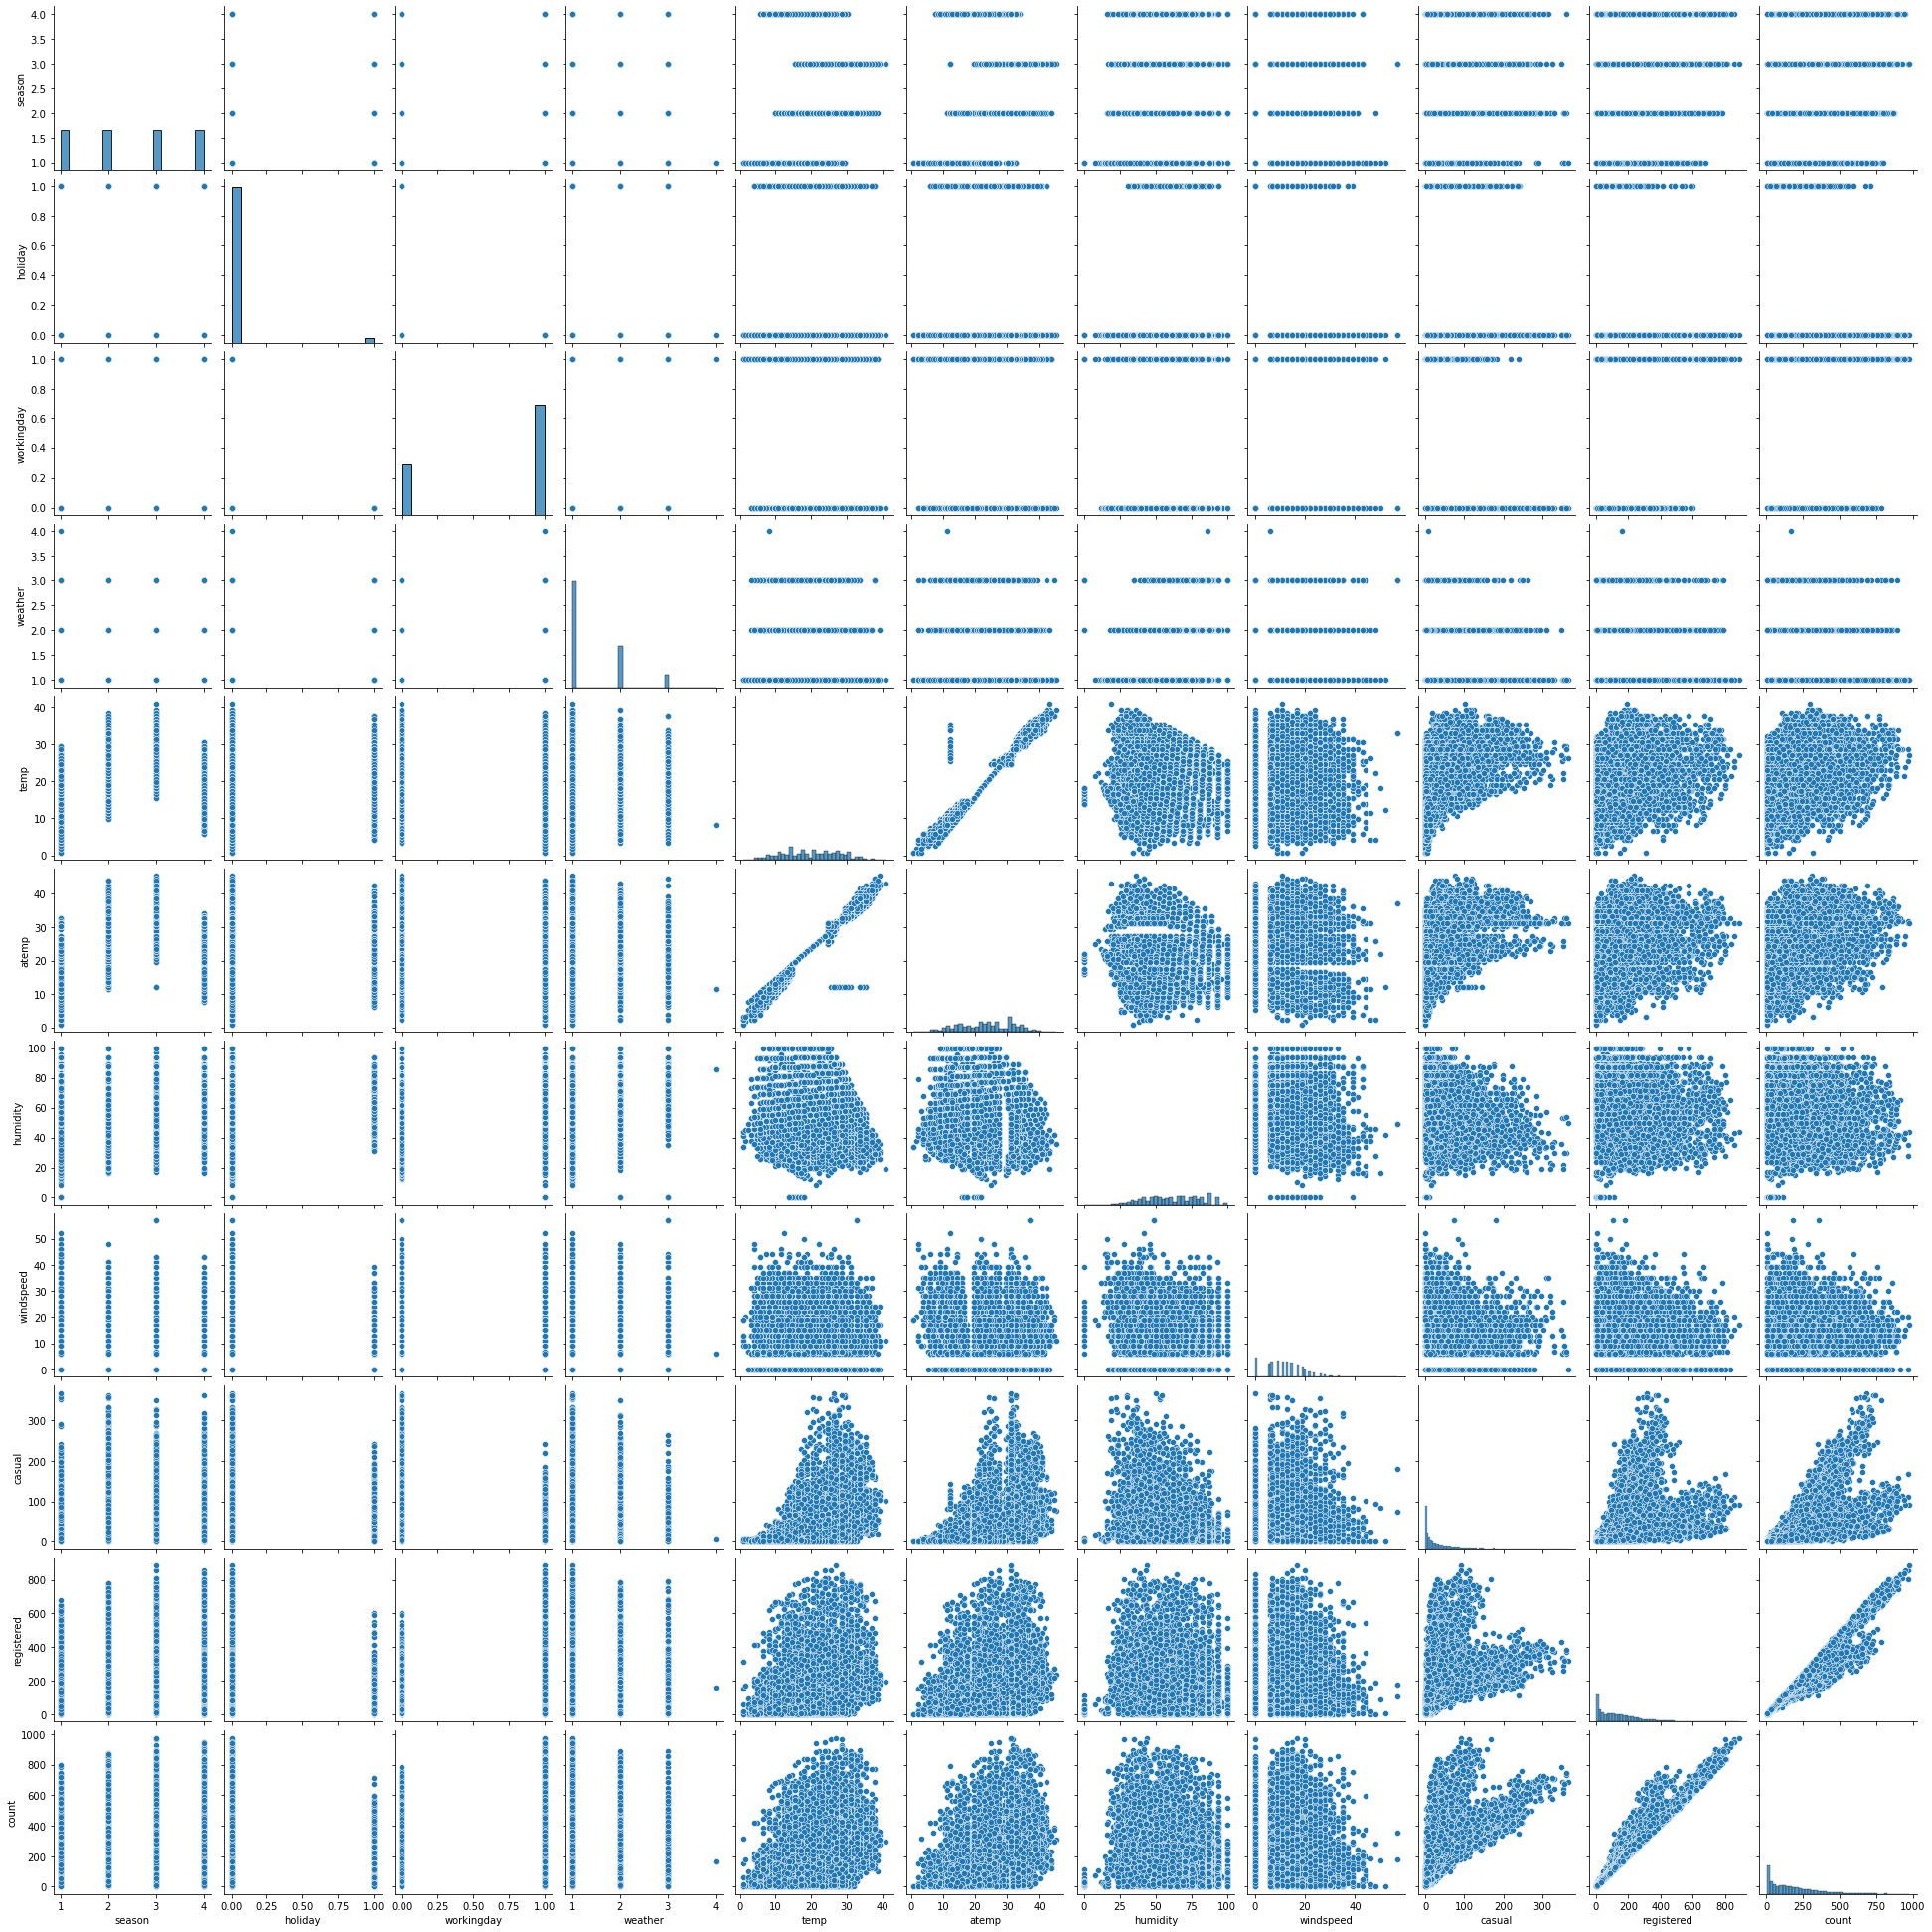

In [14]:
sns.pairplot(data=df)

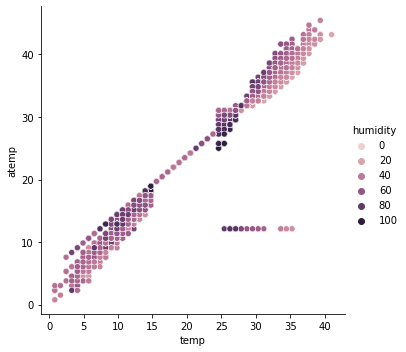

In [15]:
sns.relplot(x="temp", y="atemp", data=df, hue='humidity')

In [16]:
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year:
        dd = dd[dd.datetime.dt.year == year]
        dd.loc[:, ('hour')] = dd.datetime.dt.hour
        
        by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
        
        return by_hour.plot(kind='bar', ylim=(0, 150000), figsize=(15, 5), width=0.9, title="Year = {0}".format(year))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:title={'center':'Year = 2011'}, xlabel='hour'>

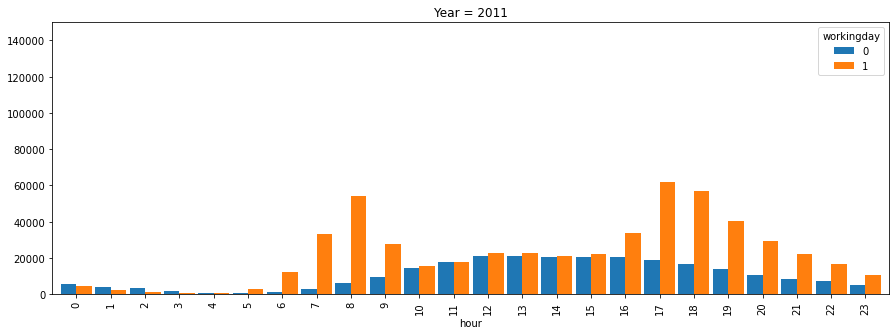

In [17]:
plot_by_hour(df, year=2011)

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

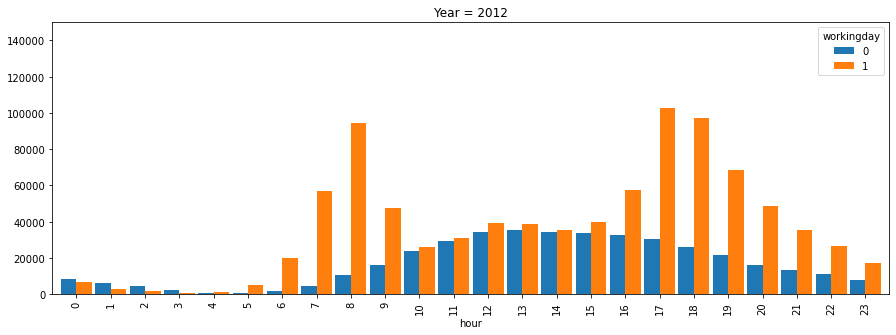

In [18]:
plot_by_hour(df, year=2012)

In [19]:
def plot_by_year(agg_attr, title):
    dd = df.copy()
    
    dd['year'] = df.datetime.dt.year
    dd['month'] = df.datetime.dt.month
    dd['hour'] = df.datetime.dt.hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    
    return by_year.plot(kind='bar', figsize=(15, 5), width=0.9, title=title)

<AxesSubplot:title={'center':'Rent bike per month in 2011 and 2012'}, xlabel='month'>

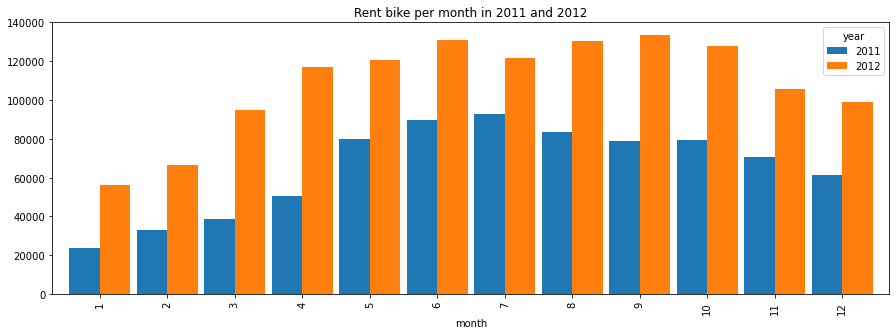

In [20]:
plot_by_year('month', "Rent bike per month in 2011 and 2012")

<AxesSubplot:title={'center':'Rent bike per month in 2011 and 2012'}, xlabel='hour'>

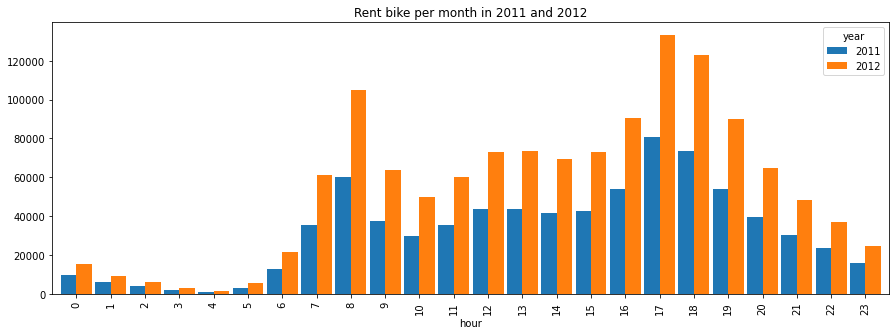

In [21]:
plot_by_year('hour', "Rent bike per month in 2011 and 2012")

In [22]:
def plot_by_year_box(agg_attr, title):
    dd = df.copy()
    
    dd['year'] = df.datetime.dt.year
    dd['month'] = df.datetime.dt.month
    dd['hour'] = df.datetime.dt.hour
    
    by_year = dd.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    
    return by_year.plot(kind='box', figsize=(15, 5), title=title)

<AxesSubplot:title={'center':'Rent bike per month in 2011 and 2012'}>

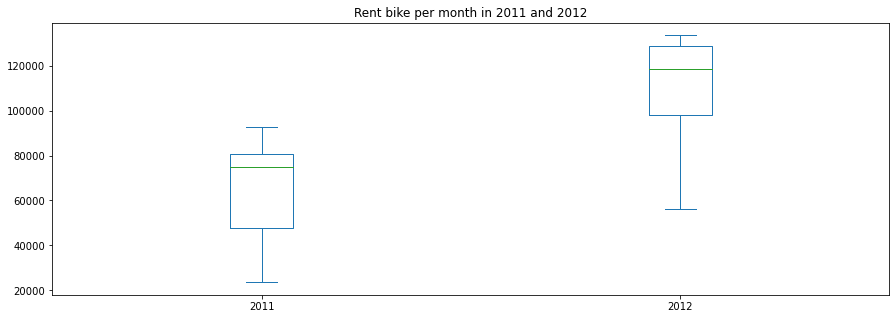

In [23]:
plot_by_year_box('month', "Rent bike per month in 2011 and 2012")

<AxesSubplot:title={'center':'Rent bike per month in 2011 and 2012'}>

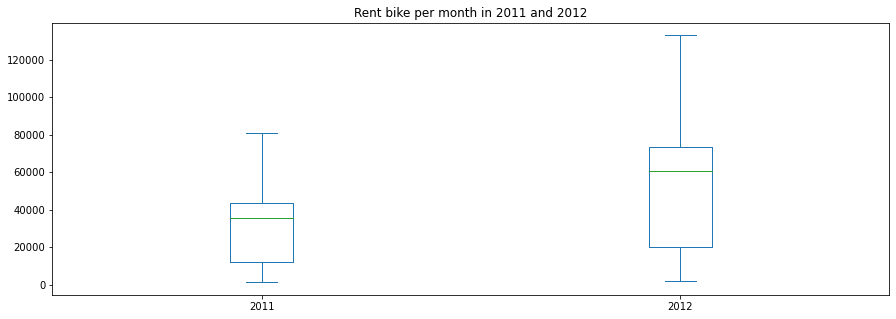

In [24]:
plot_by_year_box('hour', "Rent bike per month in 2011 and 2012")

<AxesSubplot:>

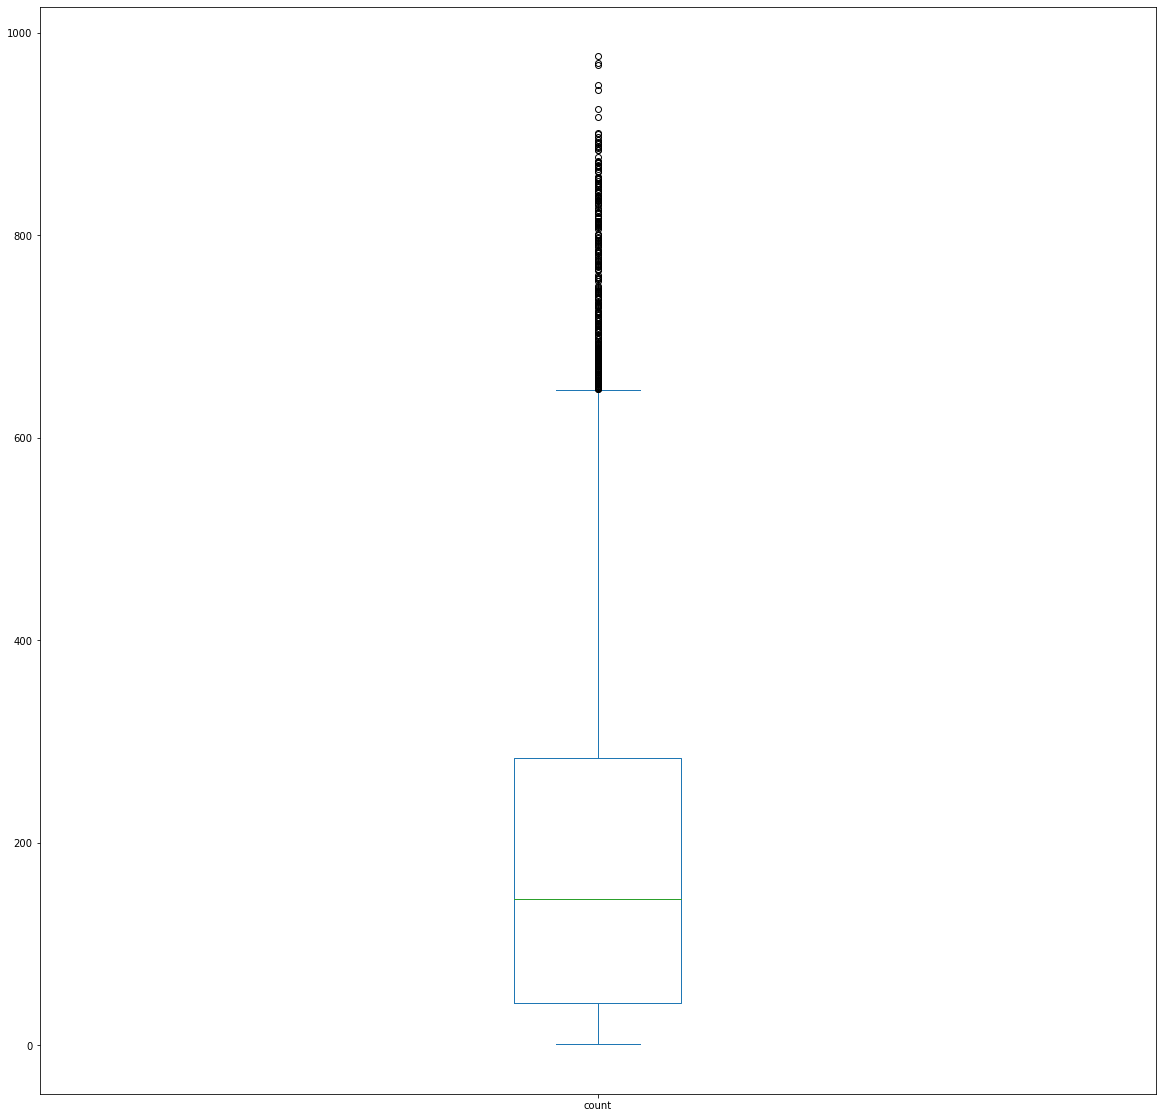

In [25]:
df['count'].plot(kind='box', figsize=(20, 20))

In [31]:
def plot_by_hour(data):
    dd = data.copy()
    
    dd['hour'] = data.datetime.dt.hour
    
    hours = {}
    for hour in range(24):
        hours[hour] = dd[dd.hour == hour]['count'].values
        
    plt.figure(figsize=(20, 10))
    plt.ylabel("Count Rent")
    plt.xlabel("Hours")
    plt.title("Count vs Hour")
    plt.boxplot([hours[hour] for hour in range(24)])
    
    axis = plt.gca()
    axis.set_ylim([1, 1200])

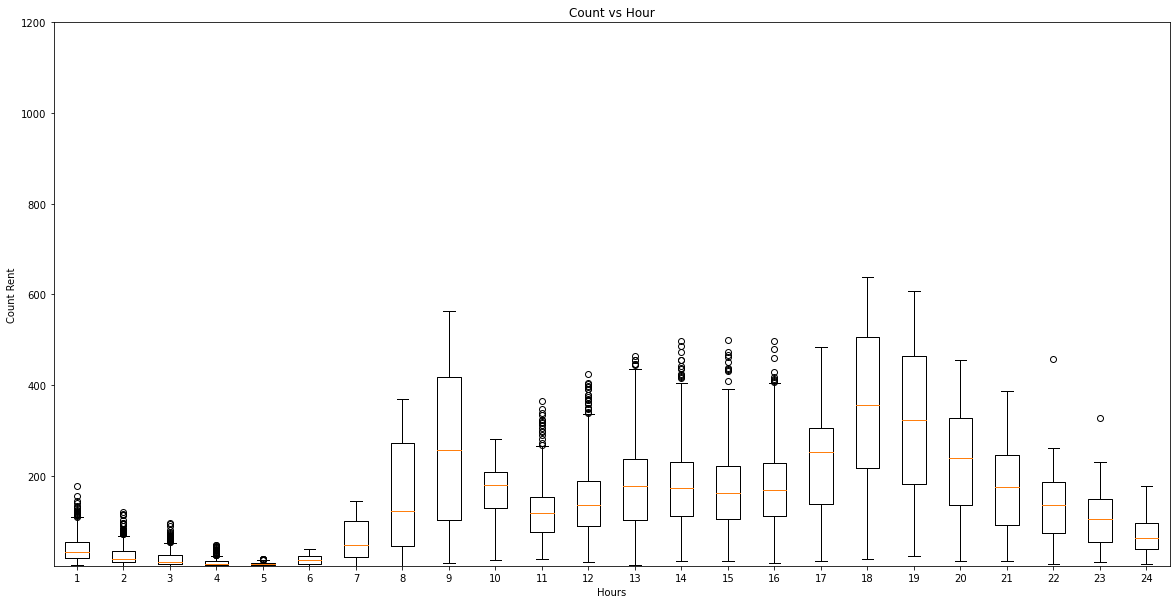

In [32]:
plot_by_hour(df[df.datetime.dt.year == 2011])

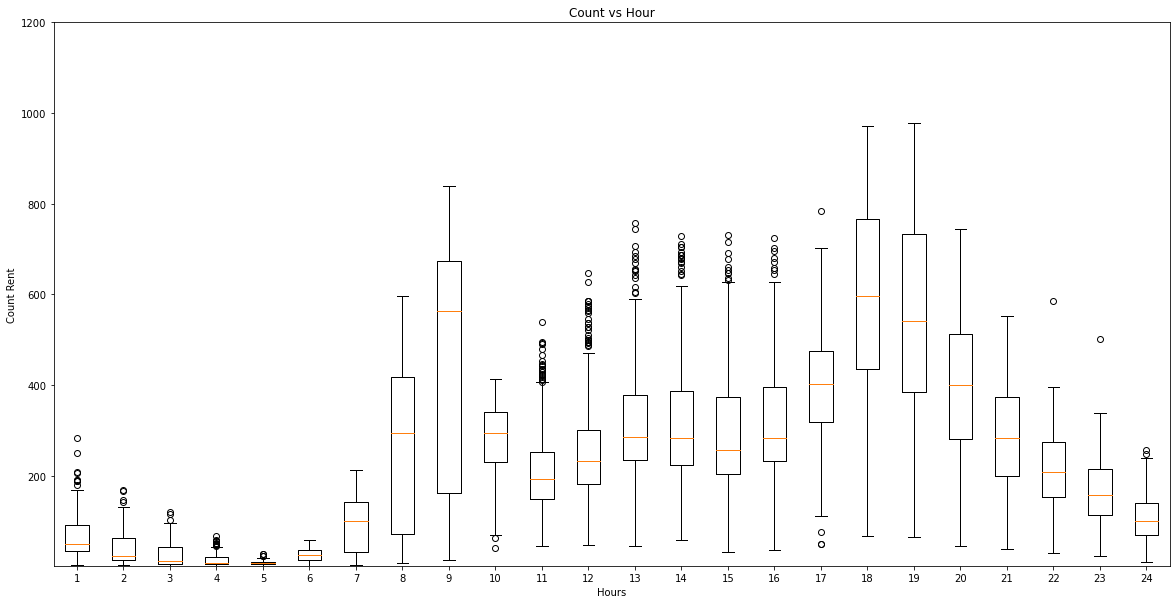

In [33]:
plot_by_hour(df[df.datetime.dt.year == 2012])

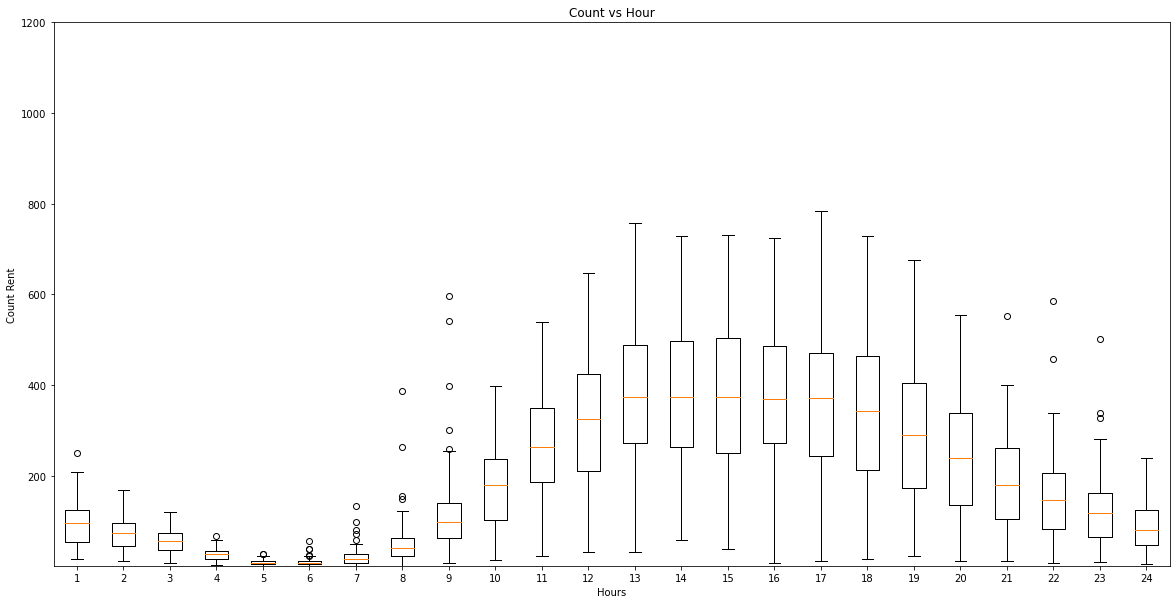

In [34]:
plot_by_hour(df[df.workingday == 0])

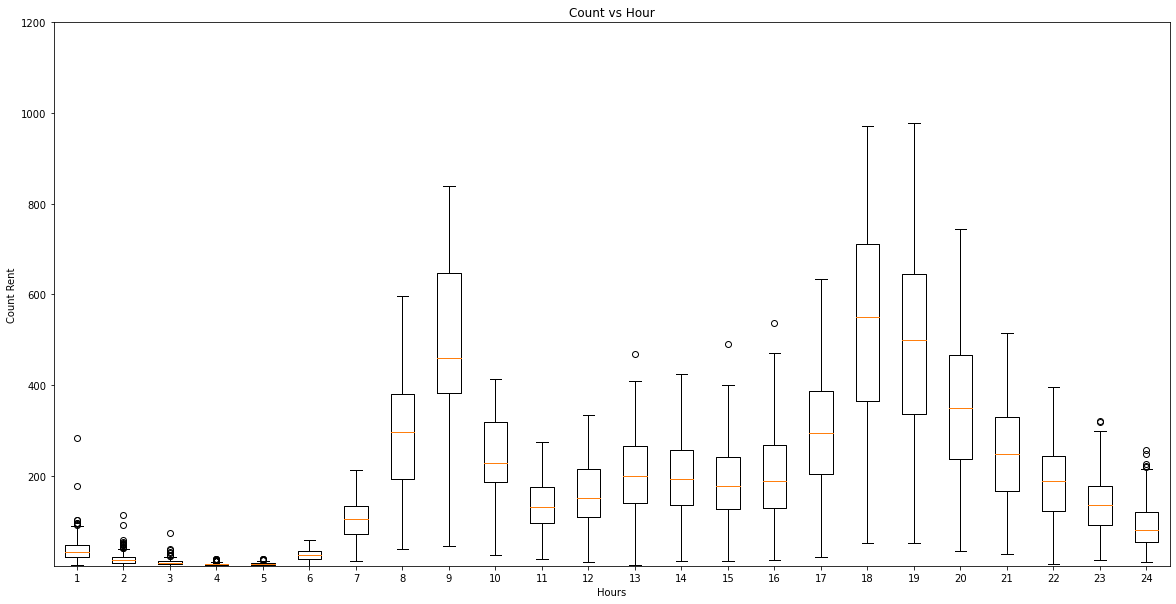

In [35]:
plot_by_hour(df[df.workingday == 1])

In [36]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# Feature Engineering

In [37]:
def convert_hour_(hour):
    if 0 <= hour < 6:
        return 0
    elif 6 <= hour < 13:
        return 1
    elif 13 <= hour < 19:
        return 2
    elif 19 <= hour < 24:
        return 3

In [39]:
dt = pd.to_datetime(df['datetime'])
df['hour'] = dt.map(lambda x:x.hour)
df['hour'] = df['hour'].apply(convert_hour_)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [40]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,3
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,3
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,3
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,3
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,3


In [41]:
df.drop('datetime', axis=1, inplace=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


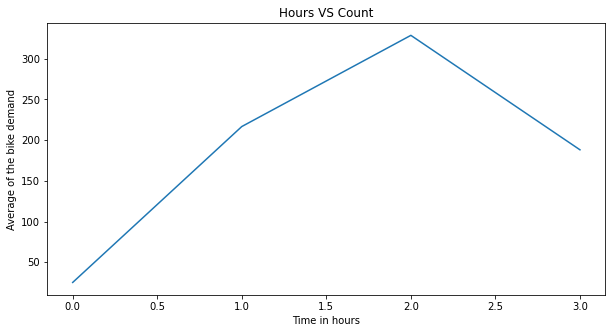

In [42]:
# an hour vs count graph average bike demand based on hour
fig, axes = plt.subplots(figsize=(10, 5))
hours = df.groupby('hour').agg("mean")["count"]
hours.plot(kind="line", ax=axes)
plt.title("Hours VS Count")
axes.set_xlabel("Time in hours")
axes.set_ylabel("Average of the bike demand")
plt.show()

<AxesSubplot:xlabel='temp'>

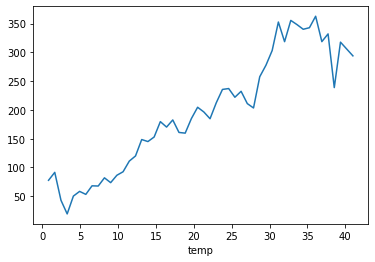

In [43]:
df.groupby('temp')['count'].mean().plot()

<AxesSubplot:xlabel='holiday'>

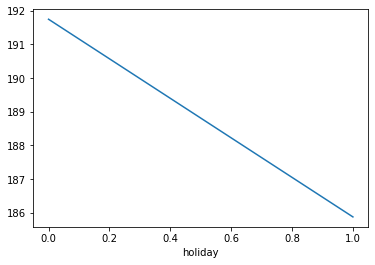

In [44]:
df.groupby('holiday')['count'].mean().plot()

# Feature selection

In [45]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [ ]:
x = df.drop('count')
y = df['count']

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
linear.score(x_train, y_train)
linear.score(x_test, y_test)